# JIE YUAN, jy3339, jy3339@gsb.columbia.edu

## Study Group Member: Jie Yuan, Justin Yu, Shirley Zhang, Wenxin Zeng, Zijin Jiang

### Load Data:

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\yuanj\Desktop\CU1\Econometrics and Statistical Inference\hw2\nls_2008.txt", header = None, sep="\s+",
                names = ['luwe','educ','exper','age','fed','med','kww','iq','white'])
df

,luwe,educ,exper,age,fed,med,kww,iq,white
0,5.728709,12,13,31,8,8,35,93,1
1,6.000853,18,13,37,14,14,41,119,1
2,5.798709,14,13,33,14,14,46,108,1
3,5.560709,12,14,32,12,12,32,96,1
4,5.415709,11,17,34,11,6,27,74,1
...,...,...,...,...,...,...,...,...,...
925,5.670492,12,17,35,8,7,39,93,1
926,5.752709,11,15,32,0,9,23,100,0
927,5.599499,12,15,33,0,12,38,101,1
928,5.369492,12,13,31,7,7,33,100,1


### Q1: Report the minimum, maximum, mean and standard deviation for all variables.

In [2]:
df.describe().loc[['max', 'min', 'mean', 'std']]

,luwe,educ,exper,age,fed,med,kww,iq,white
max,7.601318,18.000000,23.000000,38.000000,18.000000,18.000000,56.000000,145.000000,1.000000
min,4.055853,9.000000,5.000000,28.000000,0.000000,0.000000,12.000000,50.000000,0.000000
mean,5.945158,13.470968,13.623656,33.094624,8.122581,9.816129,35.787097,101.317204,0.873118
std,0.442819,2.199353,3.827873,3.104161,5.072353,4.005588,7.631576,15.050951,0.333020


***As is shown above, the max, min, mean, and std are shown for each variable.***

### Q2: Estimate a normal linear regression model for log weekly wages on education, experience, and experience squared (where experience is potential experience, equal to age minus years of education minus six). Report the estimates and both the conventional (homoskedastic) and robust (heteroskedasticity consistent) standard errors. Also report the full variance/covariance matrix for all parameters, that is both the regression parameters as well as the residual variance.

#### Add the column of potential experience^2:

In [3]:
df['p_exper^2'] =df['exper']**2
df

,luwe,educ,exper,age,fed,med,kww,iq,white,p_exper^2
0,5.728709,12,13,31,8,8,35,93,1,169
1,6.000853,18,13,37,14,14,41,119,1,169
2,5.798709,14,13,33,14,14,46,108,1,169
3,5.560709,12,14,32,12,12,32,96,1,196
4,5.415709,11,17,34,11,6,27,74,1,289
...,...,...,...,...,...,...,...,...,...,...
925,5.670492,12,17,35,8,7,39,93,1,289
926,5.752709,11,15,32,0,9,23,100,0,225
927,5.599499,12,15,33,0,12,38,101,1,225
928,5.369492,12,13,31,7,7,33,100,1,169


#### Perform the OLS regression(homoskedastic case):

In [4]:
import statsmodels.api as sm
from bs4 import BeautifulSoup
y = df['luwe']
X = df[['educ', 'exper', 'p_exper^2']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
# display(model.summary())

def model_output(model):
    summary_html = model.summary().as_html()
    html_data = summary_html
    soup = BeautifulSoup(html_data, 'html.parser')
    coef_table = soup.find_all('table', class_='simpletable')[1]

    for row in coef_table.find_all('tr')[1:]: 
        th = row.th
        th['style'] = 'background-color: yellow'

        coef_td = row.find_all('td')[0]
        coef_td['style'] = 'background-color: yellow'

        std_err_td = row.find_all('td')[1]
        std_err_td['style'] = 'background-color: yellow'

    highlighted_html = str(soup)
    from IPython.display import display, HTML
    display(HTML(highlighted_html))
model_output(model)

***As is shown above, the estimates and the conventional (homoskedastic) standard error is highlighted in the above table.***

#### Now in the next session we do robust (heteroskedasticity consistent) standard errors:

In [5]:
robust_model = sm.OLS(y, X).fit(cov_type='HC3')  # HC3 is one type of heteroskedasticity robust SE

model_output(robust_model)

***As is shown above, the estimates and the robust (heteroskedasticity consistent) standard error is highlighted in the above table.***

#### variance/covariance matrix for parameters and residuals:

In [6]:
display('For conventional:',model.cov_params())
display('For robust:',robust_model.cov_params())

'For conventional:'

,const,educ,exper,p_exper^2
const,0.049737,-1.137084e-03,-0.004684,1.476767e-04
educ,-0.001137,5.746865e-05,0.000035,-5.506074e-07
exper,-0.004684,3.473218e-05,0.000625,-2.147994e-05
p_exper^2,0.000148,-5.506074e-07,-0.000021,7.609628e-07


'For robust:'

,const,educ,exper,p_exper^2
const,0.046441,-1.081712e-03,-0.004306,1.345579e-04
educ,-0.001082,5.949615e-05,0.000021,-3.818309e-08
exper,-0.004306,2.122866e-05,0.000599,-2.068923e-05
p_exper^2,0.000135,-3.818309e-08,-0.000021,7.377870e-07


In [7]:
residual_variance = model.resid.var()
residual_variance_robust = robust_model.resid.var()
display("Residual Variance (Conventional):", residual_variance)
display("Residual Variance (Robust):", residual_variance_robust)

'Residual Variance (Conventional):'

0.168077229654943

'Residual Variance (Robust):'

0.168077229654943

### Q3:  Predict the effect on average log earnings of decreasing everybody’s education level by one year, taking account of the effect changing someone’s education has on their (potential) experience.

#### Display the result from ols regression in previous questions:

In [8]:
def format_ols_equation(results, dependent_var='luwe'):
    """
    Parameters:
    - results: OLS results object from statsmodels
    - dependent_var: name of the dependent variable
    Returns:
    - A string representing the equation
    """
    params = results.params
    terms = [f"{dependent_var} = {params[0]:.3f}"]  # intercept

    for i, var in enumerate(results.model.exog_names[1:]):  # skip the constant
        if params[i+1] >= 0:  # positive coefficient
            terms.append(f"+ {params[i+1]:.5f}{var}")
        else:  # negative coefficient
            terms.append(f"- {-params[i+1]:.5f}{var}")

    equation = " ".join(terms)
    return equation

format_ols_equation(model, dependent_var='luwe')

'luwe = 4.031 + 0.09251educ + 0.07678exper - 0.00189p_exper^2'

In [9]:
df_new = df.copy()
df_new['educ'] = df_new['educ'] -1
df_new['exper'] = df_new['age'] - df_new['educ'] - 6
df_new['p_exper^2'] = df_new['exper']**2
df_new['luwe-hat'] = model.params[0] + model.params[1]* df_new['educ'] +model.params[2]* df_new['exper'] + model.params[3]* df_new['p_exper^2']
'''
df['luwe-hat'] = model.params[0] + model.params[1]* df['educ'] +model.params[2]* df['exper'] + model.params[3]* df['p_exper^2']
display(df[['luwe-hat']].describe().loc[['mean']])
'''
display(df_new[['luwe','luwe-hat']].describe().loc[['mean']])
print(f"average of luwe-hat - average of luwe = {df_new['luwe-hat'].mean() - df_new['luwe'].mean()}")

,luwe,luwe-hat
mean,5.945158,5.87615


average of luwe-hat - average of luwe = -0.06900709523277548


***As is shown above, the effect of in education reduces the average log earnings by -0.069***

Note that E(ε) = 0, so comparing the original luwe with new luwe-hat is equivalant to comparing the original luwe-hat with new luwe-hat.

### Q4: Can you obtain the above effect by running a regression with a redefined set of covariates? How?


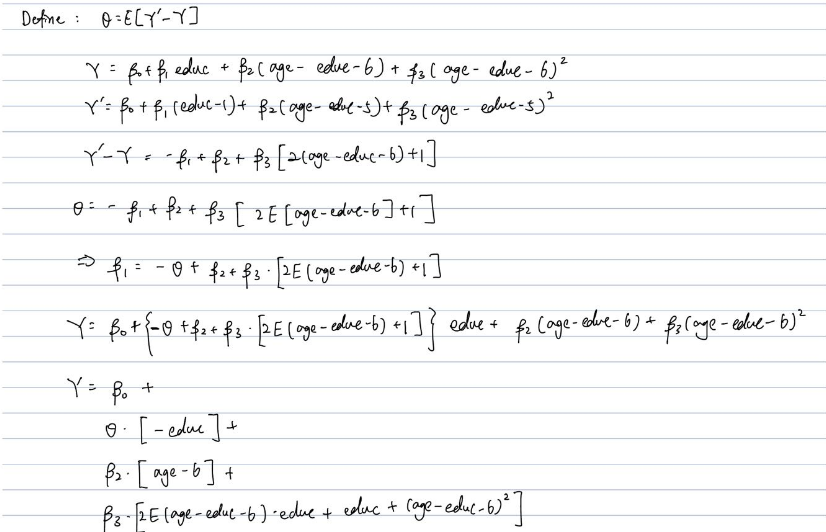

In [10]:
dfQ4 = df.copy()
dfQ4['Z1'] = dfQ4['educ'] *(-1)
dfQ4['Z2'] = dfQ4['age'] -6
dfQ4['Z3'] = 2*((dfQ4['age'].mean()-dfQ4['educ'].mean()-6))*dfQ4['educ']+dfQ4['educ']+(dfQ4['age']-dfQ4['educ']-6)**2

y = dfQ4['luwe']
X = dfQ4[['Z1', 'Z2','Z3']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
# display(model.summary())

model_output(model)

In [11]:
print(f'The params for Z1 is {model.params[1]},which is exactly the answer of Q3!')

The params for Z1 is -0.06900709523276069,which is exactly the answer of Q3!


### Q5: Predict the effect on the average level of earnings (conditional on the covariates) of the following policy: increase the level of education for those who currently have a level of education below 12 years of education to 12, and leave the level of education for others unchanged.

***First, update table with new policy***

In [12]:
df_new = df.copy()


y = df_new['luwe']
X = df_new[['educ', 'exper', 'p_exper^2']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
# display(model.summary())



df_new.loc[df_new['educ'] < 12, 'educ'] = 12
df_new['exper'] = df_new['age'] - df_new['educ'] -6
df_new['p_exper^2'] = df_new['exper']**2
df_new

,luwe,educ,exper,age,fed,med,kww,iq,white,p_exper^2
0,5.728709,12,13,31,8,8,35,93,1,169
1,6.000853,18,13,37,14,14,41,119,1,169
2,5.798709,14,13,33,14,14,46,108,1,169
3,5.560709,12,14,32,12,12,32,96,1,196
4,5.415709,12,16,34,11,6,27,74,1,256
...,...,...,...,...,...,...,...,...,...,...
925,5.670492,12,17,35,8,7,39,93,1,289
926,5.752709,12,14,32,0,9,23,100,0,196
927,5.599499,12,15,33,0,12,38,101,1,225
928,5.369492,12,13,31,7,7,33,100,1,169


In [13]:
df_new['luwe-hat'] = model.params[0] + model.params[1]* df_new['educ'] +model.params[2]* df_new['exper'] +model.params[3]* df_new['p_exper^2']

display(df_new[['luwe','luwe-hat']].describe().loc[['mean']])
print(f"average of luwe-hat - average of luwe = {df_new['luwe-hat'].mean() - df_new['luwe'].mean()}")

,luwe,luwe-hat
mean,5.945158,5.957487


average of luwe-hat - average of luwe = 0.012329600532403617


***On average, this new policy has increased log earnings by 0.0118***

### Q6: Calculate the standard error for the above policy using the Delta method (both for the conventional standard errors and for the robust standard errors).

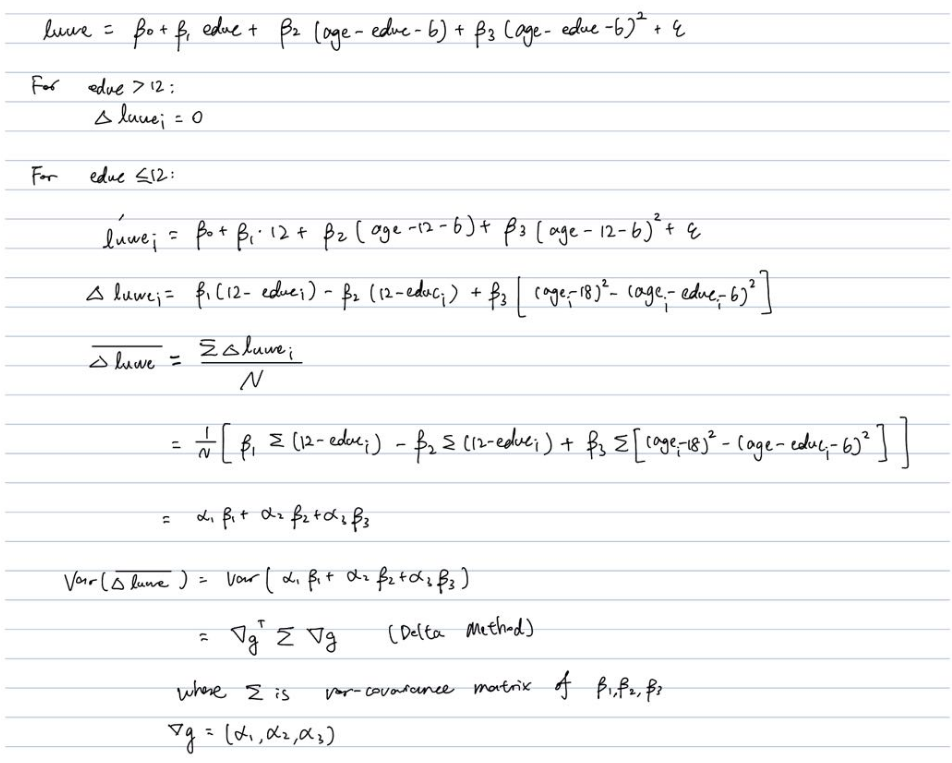

***Note that we should have g(β0，β1，β2，β3，σ^2), but coefficient β0 and error term σ^2 will diminish when calculating gradient g, because the partical derivative of g with respect to these two parameters will be zero. To simplify our calculation, we reasonably abandon β0 and σ^2 and only consider β1, β2, and β3***

In [14]:
df_Q6 = df.copy()

y = df_Q6['luwe']
X = df_Q6[['educ', 'exper', 'p_exper^2']]
X = sm.add_constant(X)

model_Q6 = sm.OLS(y, X).fit()
robust_model_Q6 = sm.OLS(y, X).fit(cov_type='HC3')
# display(model.summary())

format_ols_equation(model_Q6, dependent_var='luwe')

'luwe = 4.031 + 0.09251educ + 0.07678exper - 0.00189p_exper^2'

#### Calculate ∑:

In [15]:
sigema = model.cov_params()
sigema = sigema.drop('const', axis=0)
sigema = sigema.drop('const', axis=1)
sigema

,educ,exper,p_exper^2
educ,5.746865e-05,0.000035,-5.506074e-07
exper,3.473218e-05,0.000625,-2.147994e-05
p_exper^2,-5.506074e-07,-0.000021,7.609628e-07


In [16]:
sigema_robust = robust_model_Q6.cov_params()
sigema_robust = sigema_robust.drop('const', axis=0)
sigema_robust = sigema_robust.drop('const', axis=1)
sigema_robust

,educ,exper,p_exper^2
educ,5.949615e-05,0.000021,-3.818309e-08
exper,2.122866e-05,0.000599,-2.068923e-05
p_exper^2,-3.818309e-08,-0.000021,7.377870e-07


#### Calculate g

In [17]:
# alphas:
N = len(df_Q6)
filtered_rows = df_Q6[df_Q6['educ'] <= 12]
sum_val = (12 - filtered_rows['educ']).sum()
alpha1 = sum_val / N
alpha2 = -alpha1
sum_val2 = ((filtered_rows['age']-18)**2-(filtered_rows['age']-filtered_rows['educ']-6)**2).sum()
alpha3 = sum_val2 / N

del_g = [alpha1,alpha2,alpha3]
print(f'gradient g is: {del_g}')

gradient g is: [0.15376344086021507, -0.15376344086021507, -5.254838709677419]


#### Calculate Var(Δluwe-bar):

In [18]:
import numpy as np

A = del_g
B = sigema
B_robust = sigema_robust

A = np.array(del_g).reshape(1, -1)
C = A.T

# Compute the product ABC
result = np.dot(A, np.dot(B, C))
result_robust = np.dot(A, np.dot(B_robust, C))

std = (result[0][0])**0.5
std_robust = (result_robust[0][0])**0.5
print(f'Conventional standard error for the policy is {std}.')
print(f'Robust standard error for the policy is {std_robust}.')


Conventional standard error for the policy is 0.001299238935609132.
Robust standard error for the policy is 0.0012544657116055466.


***Here, we see that the conventional standard error is a bit higher than the robust standard error, but the difference is not so big.***

### Q7: Calculate the standard error for the above policy (still conditional on the covariates) using the nonparametric bootstrap. Use 100,000 bootstrap replications. How do the two bootstrap standard errors compare to the analytic standard errors, conventional and robust?

In [19]:
df

,luwe,educ,exper,age,fed,med,kww,iq,white,p_exper^2
0,5.728709,12,13,31,8,8,35,93,1,169
1,6.000853,18,13,37,14,14,41,119,1,169
2,5.798709,14,13,33,14,14,46,108,1,169
3,5.560709,12,14,32,12,12,32,96,1,196
4,5.415709,11,17,34,11,6,27,74,1,289
...,...,...,...,...,...,...,...,...,...,...
925,5.670492,12,17,35,8,7,39,93,1,289
926,5.752709,11,15,32,0,9,23,100,0,225
927,5.599499,12,15,33,0,12,38,101,1,225
928,5.369492,12,13,31,7,7,33,100,1,169


In [20]:
dfQ7 = df.copy()

def calculate_delta_luwe():
    bootstrap_sample = dfQ7.sample(n=930, replace=True).reset_index(drop=True)
    y = bootstrap_sample['luwe']
    X = bootstrap_sample[['educ', 'exper', 'p_exper^2']]
    X = sm.add_constant(X)

    sample_model_Q7 = sm.OLS(y, X).fit()
    sample_model_Q7_robust = sm.OLS(y, X).fit(cov_type='HC3')
    
    bootstrap_sample.loc[bootstrap_sample['educ'] < 12, 'educ'] = 12
    bootstrap_sample['exper'] = bootstrap_sample['age'] - bootstrap_sample['educ'] -6
    bootstrap_sample['p_exper^2'] = bootstrap_sample['exper']**2
    
    bootstrap_sample['luwe-hat'] = (sample_model_Q7.params[0] 
                                    + sample_model_Q7.params[1]* bootstrap_sample['educ'] 
                                    +sample_model_Q7.params[2]* bootstrap_sample['exper'] 
                                    +sample_model_Q7.params[3]* bootstrap_sample['p_exper^2'])
    
    delta_luwe = bootstrap_sample['luwe-hat'].mean() - bootstrap_sample['luwe'].mean()
    return delta_luwe

In [21]:
from tqdm import tqdm

delta_luwe_list = []

pbar = tqdm(range(100000), desc="Processing")
for i in pbar:
    result = calculate_delta_luwe()
    delta_luwe_list.append(result)
    
    # Update the progress bar postfix with the current length and standard deviation
    pbar.set_postfix({"TRIALS": len(delta_luwe_list), "Current_Bootstrap_STD": np.std(delta_luwe_list)})


Processing: 100%|███████████████████| 100000/100000 [26:51<00:00, 62.05it/s, TRIALS=1e+5, Current_Bootstrap_STD=0.0018]


***Here, we get that the standard error from bootstrap is 0.0018, both for conventional and robust. Compared to the analytical method, the standard error from simulation is a bit higher. This is probablu due to the assumptions we made when calculating the asymptotic standard error for the estimator.***